<ipython-input-2-3e259a0eefc8>:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  'Rhythm Histograms': lambda y, sr: librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), y_axis='log', x_axis='time'),


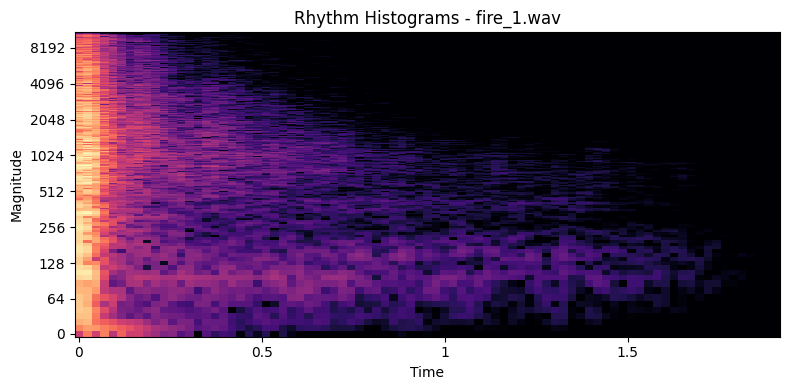

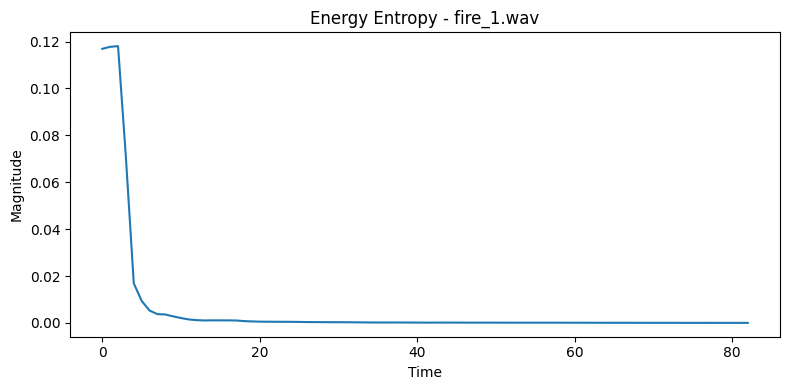

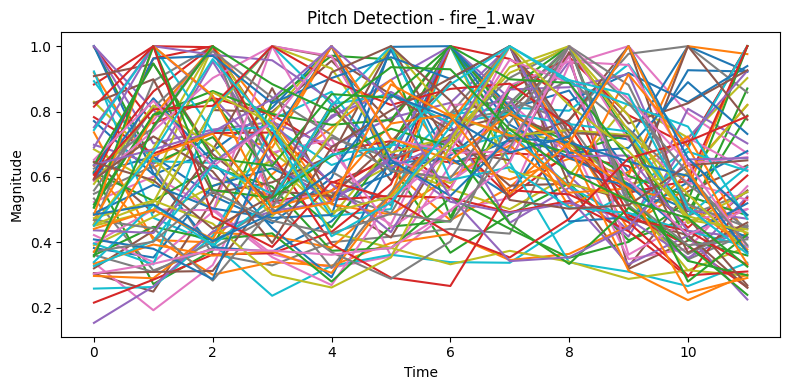

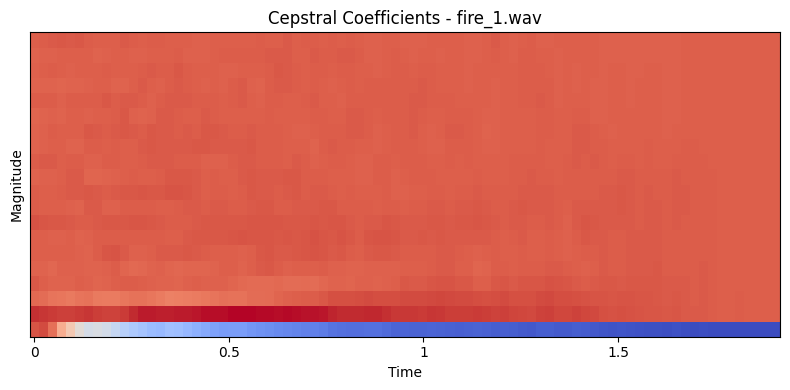

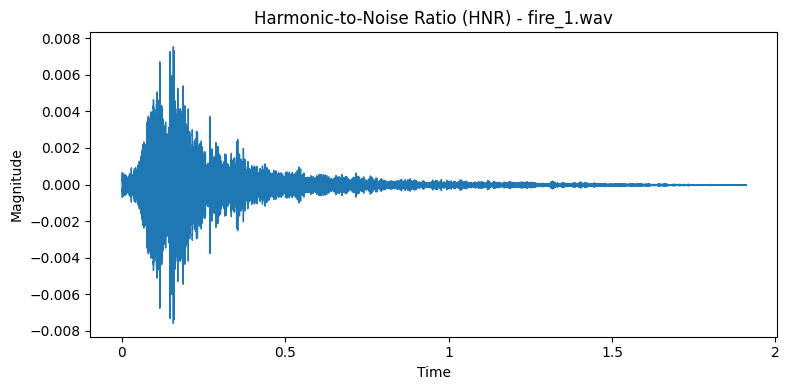

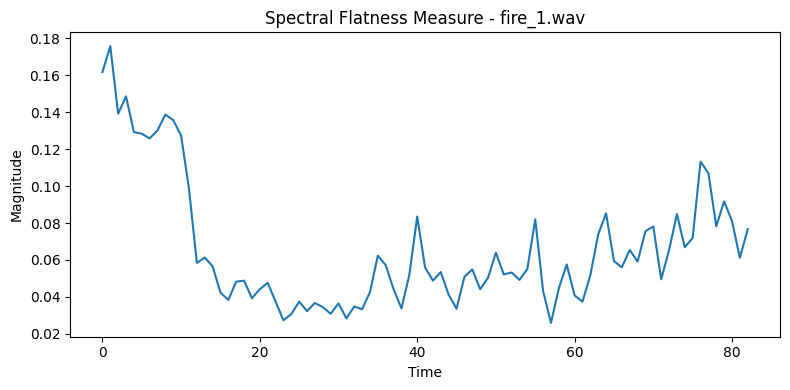

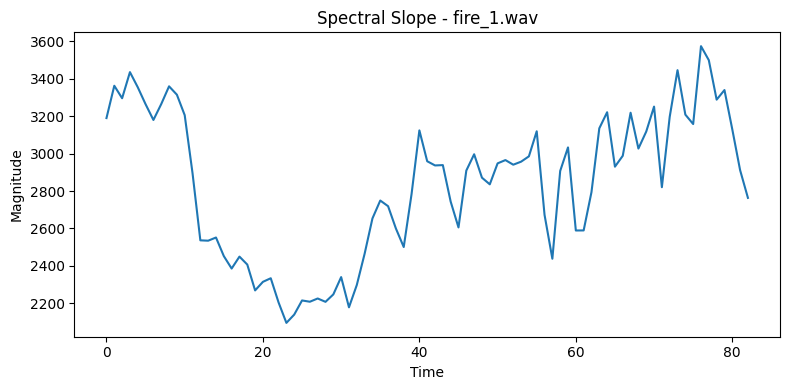

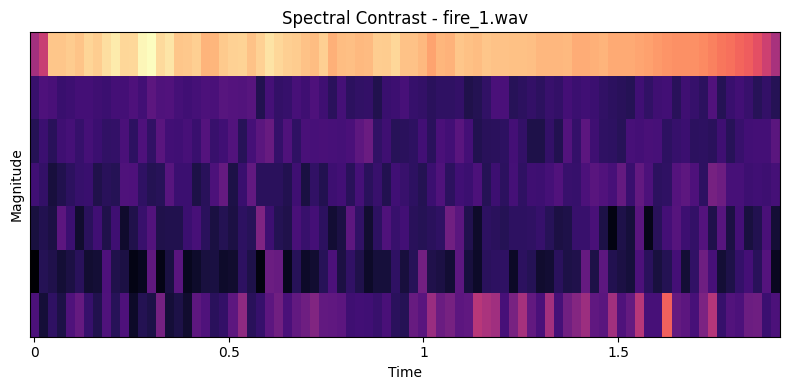

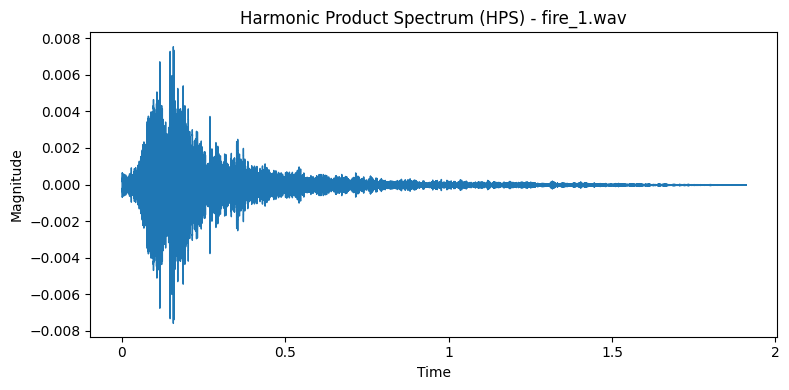

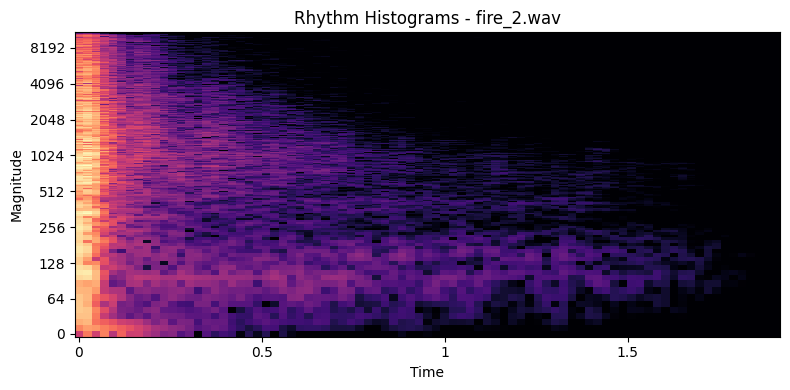

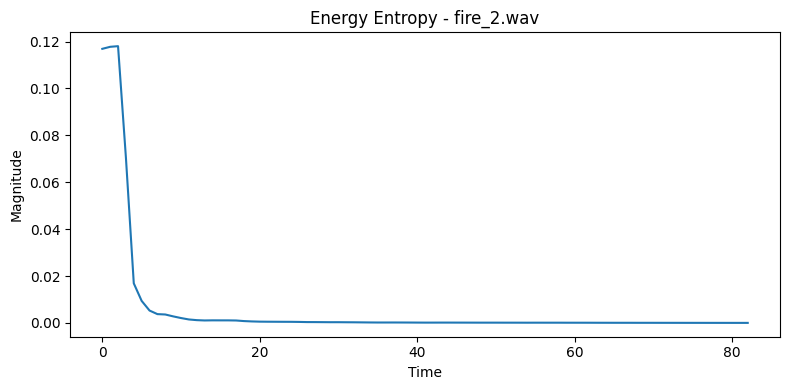

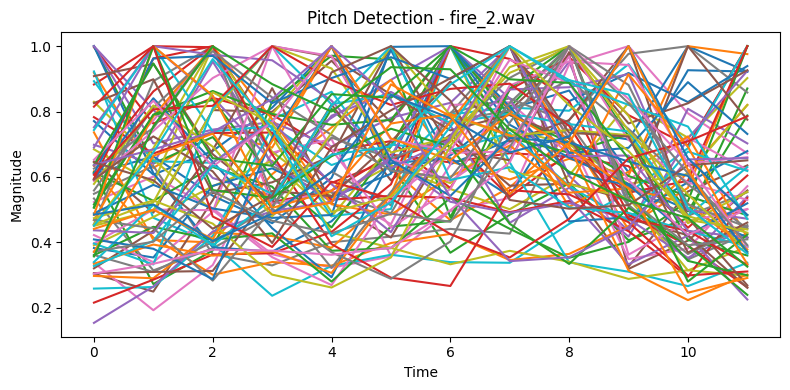

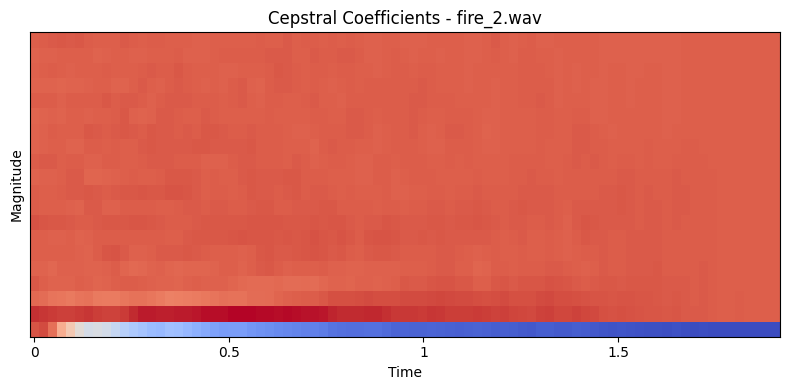

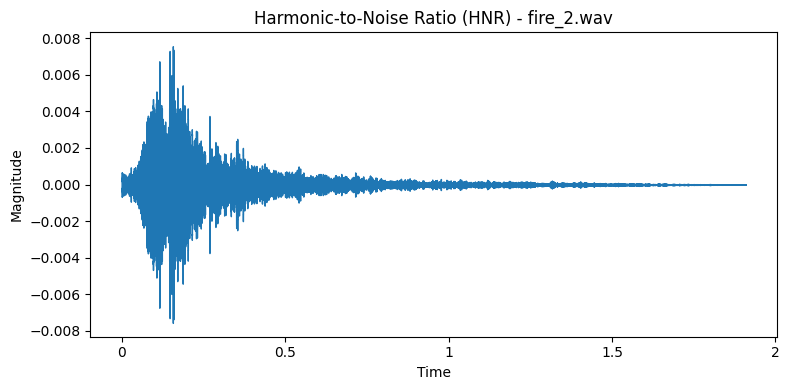

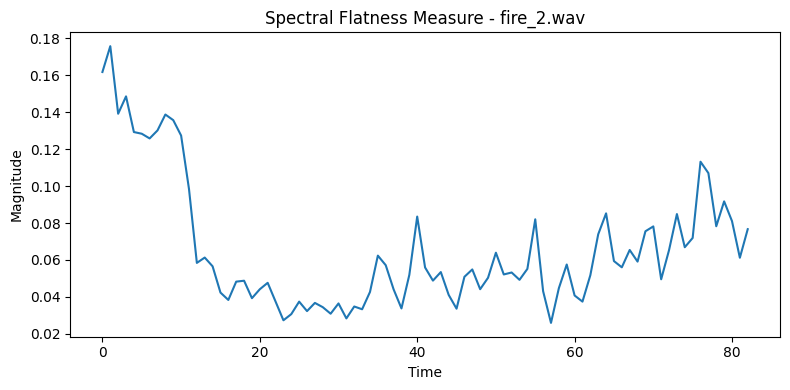

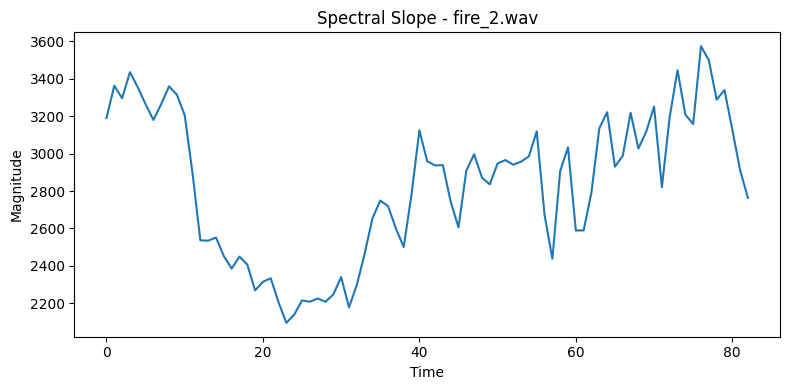

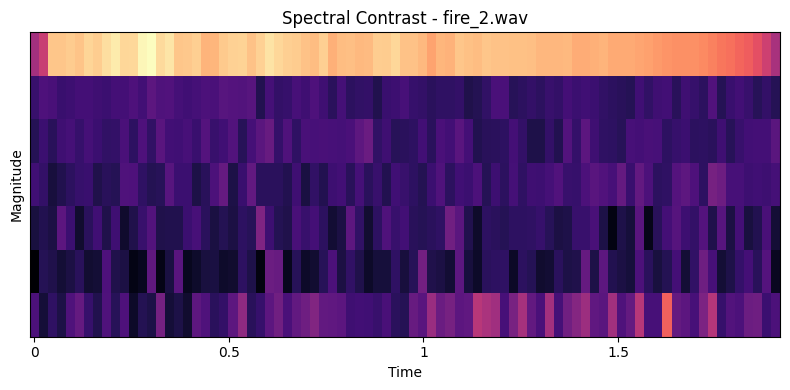

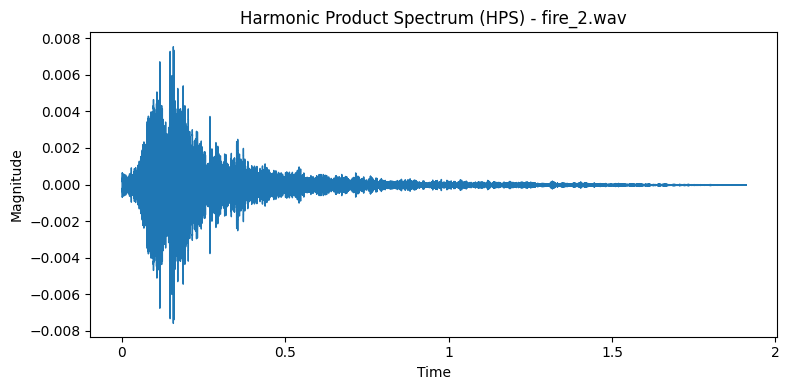

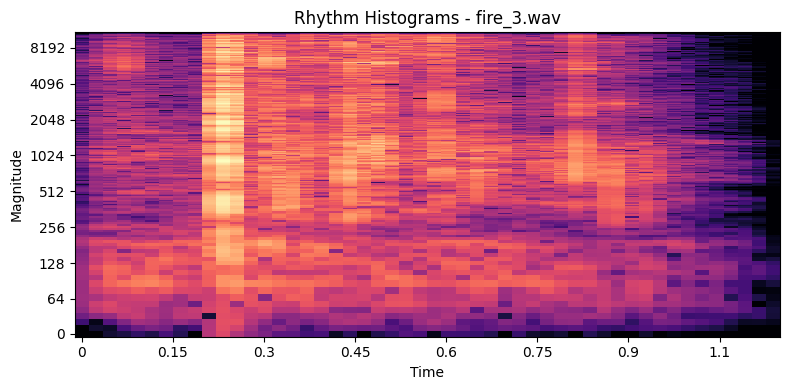

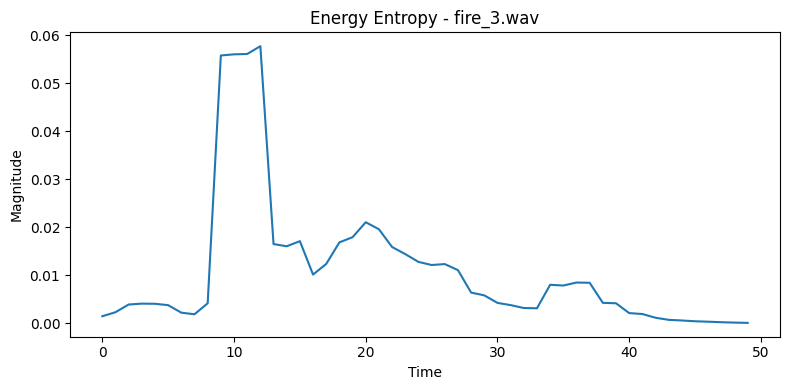

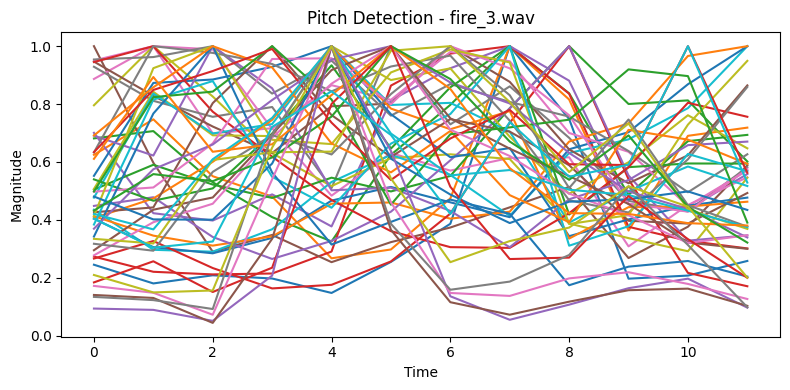

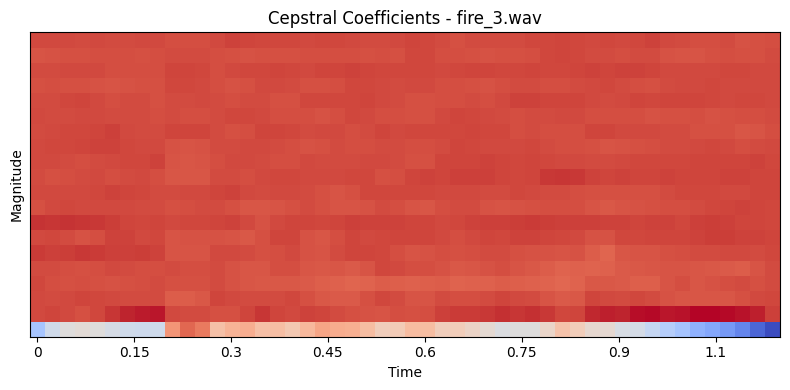

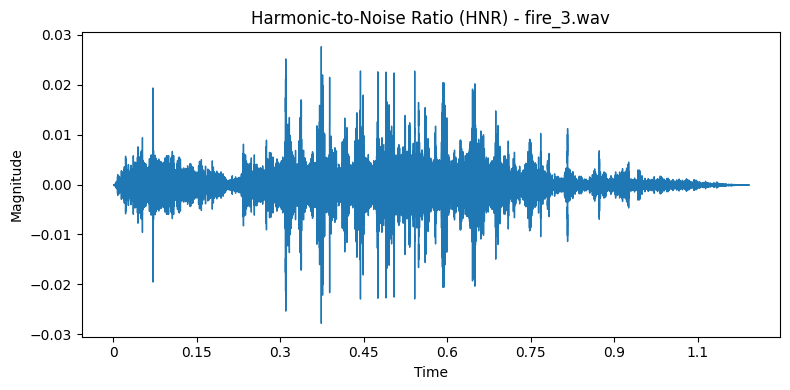

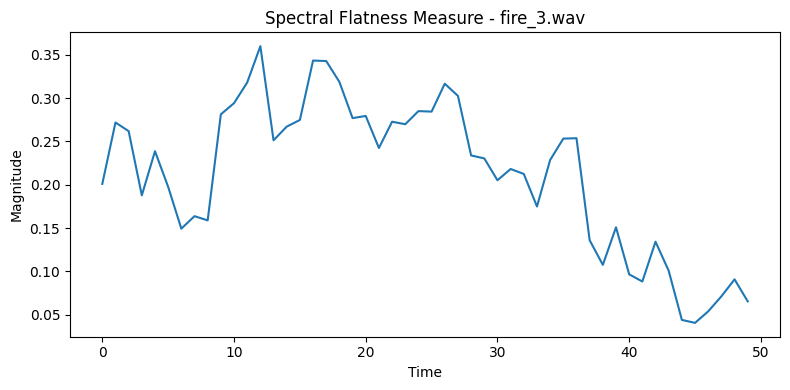

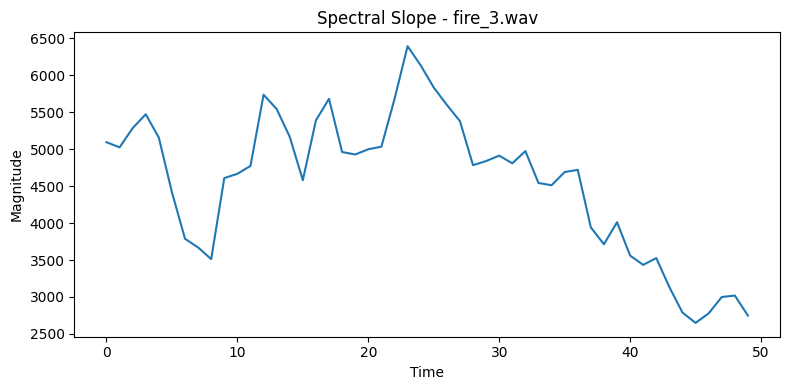

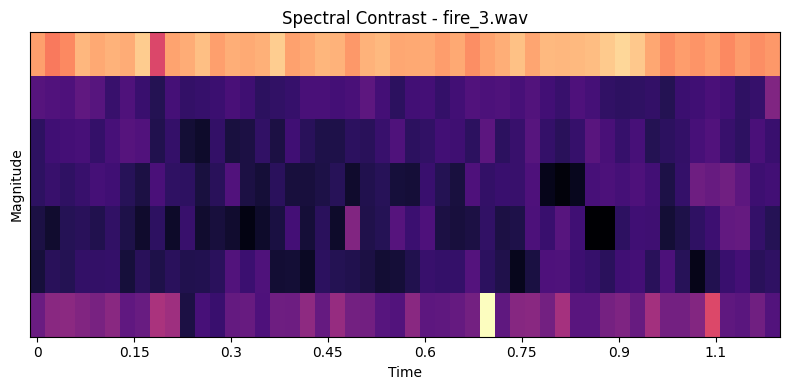

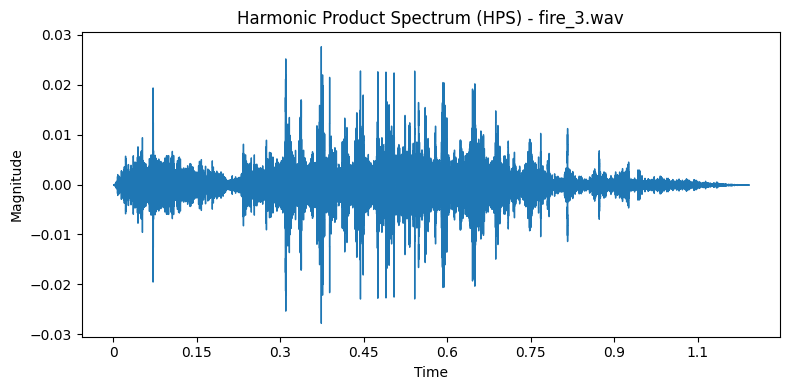

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# تابع برای نمایش ویژگی‌ها
def display_feature(y, sr, feature, title):
    plt.figure(figsize=(8, 4))

    feature_functions = {
        'Rhythm Histograms': lambda y, sr: librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), y_axis='log', x_axis='time'),
        'Energy Entropy': lambda y, sr: plt.plot(librosa.feature.rms(y=y)[0]),
        'Pitch Detection': lambda y, sr: plt.plot(librosa.feature.chroma_stft(y=y, sr=sr)),
        'Cepstral Coefficients': lambda y, sr: librosa.display.specshow(librosa.feature.mfcc(y=y, sr=sr), x_axis='time'),
        'Harmonic-to-Noise Ratio (HNR)': lambda y, sr: librosa.display.waveshow(librosa.effects.harmonic(y), sr=sr),
        'Spectral Flatness Measure': lambda y, sr: plt.plot(librosa.feature.spectral_flatness(y=y)[0]),

        'Spectral Slope': lambda y, sr: plt.plot(librosa.feature.spectral_centroid(y=y)[0]),  # استفاده از spectral_centroid به جای spectral_slope
        'Spectral Contrast': lambda y, sr: librosa.display.specshow(librosa.feature.spectral_contrast(y=y), x_axis='time'),
        'Harmonic Product Spectrum (HPS)': lambda y, sr: librosa.display.waveshow(librosa.effects.harmonic(y), sr=sr),


    }

    # اجرای تابع مربوط به ویژگی
    feature_function = feature_functions.get(feature)
    if feature_function:
        feature_function(y, sr)

    # افزودن شرح به نمودار
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

# لیست ویژگی‌ها
features = ['Rhythm Histograms', 'Energy Entropy', 'Pitch Detection', 'Cepstral Coefficients',
            'Harmonic-to-Noise Ratio (HNR)', 'Spectral Flatness Measure',
            'Spectral Slope', 'Spectral Contrast',
            'Harmonic Product Spectrum (HPS)',
           ]

# اجرای هر ویژگی برای هر فایل صوتی
file_paths = ['/content/fire_1.wav', '/content/fire_2.wav', '/content/fire_3.wav']

for file_path in file_paths:
    y, sr = librosa.load(file_path)
    for feature in features:
        title = f'{feature} - {file_path.split("/")[-1]}'
        display_feature(y, sr, feature, title)
